In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv", nrows=6868)

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [5]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4495)

In [6]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


#### 7. Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
print(gdp_df.shape)


(6868, 4)


In [8]:
print(internet_df.shape)

(4495, 4)


#### 8.	Take a look at the datatypes for the columns in each DataFrame.

In [9]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [10]:
print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


#### 9. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### 10.	Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.

In [13]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])

In [14]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

#### 11.	Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [15]:
gdp_df.rename(
    columns={"Country or Area" : "Country",
                "Value":"GDP_Per_Capita"}
          ,inplace=True)

In [16]:
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398
1  Afghanistan  2018     2033.779002
2  Afghanistan  2017     2058.383832
3  Afghanistan  2016     2057.062164
4  Afghanistan  2015     2068.265904


#### 12.	Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [17]:
internet_df.rename(
    columns={"Country or Area" : "Country",
                "Value":"Internet_Users_Pct"}
          ,inplace=True)

In [18]:
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


#### 13.	Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.

In [19]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='left', on=['Country','Year'])

In [20]:
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2019     2065.036398                 NaN
1     Afghanistan  2018     2033.779002                 NaN
2     Afghanistan  2017     2058.383832                 NaN
3     Afghanistan  2016     2057.062164                 NaN
4     Afghanistan  2015     2068.265904                 NaN
...           ...   ...             ...                 ...
6863     Zimbabwe  1994     3263.934978            0.001739
6864     Zimbabwe  1993     3033.504852                 NaN
6865     Zimbabwe  1992     3054.889178                 NaN
6866     Zimbabwe  1991     3426.598094                 NaN
6867     Zimbabwe  1990     3324.348171            0.000000

[6868 rows x 4 columns]


#### 14.	Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [21]:
print(gdp_and_internet_use.head())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2019     2065.036398                 NaN
1  Afghanistan  2018     2033.779002                 NaN
2  Afghanistan  2017     2058.383832                 NaN
3  Afghanistan  2016     2057.062164                 NaN
4  Afghanistan  2015     2068.265904                 NaN


#### 15.	Look at the last five rows to make sure the data is clean and as expected.

In [22]:
print(gdp_df.tail())

       Country  Year  GDP_Per_Capita
6863  Zimbabwe  1994     3263.934978
6864  Zimbabwe  1993     3033.504852
6865  Zimbabwe  1992     3054.889178
6866  Zimbabwe  1991     3426.598094
6867  Zimbabwe  1990     3324.348171


#### 16.	Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.


In [23]:
df_2004 = gdp_and_internet_use[gdp_and_internet_use.Year == 2004]
df_2009 = gdp_and_internet_use[gdp_and_internet_use.Year == 2009]
df_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]

subset_df = pd.concat([df_2004, df_2009, df_2014])

print(subset_df)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
15            Afghanistan  2004     1200.278256            0.105809
33                Albania  2004     7604.838002            2.420388
63                Algeria  2004    10058.435939            4.634475
93                 Angola  2004     5593.241537            0.464815
123   Antigua and Barbuda  2004    18745.681534           24.266544
...                   ...   ...             ...                 ...
6727              Vietnam  2014     6098.489609                 NaN
6757   West Bank and Gaza  2014     5967.073437                 NaN
6783                World  2014    15189.648507                 NaN
6813               Zambia  2014     3450.046561           17.340000
6843             Zimbabwe  2014     2955.240287           19.890000

[708 rows x 4 columns]


#### 17.	Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

#### already did this above to create subset (feeling like I did that question wrong)

#### 18.	Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [24]:
df_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]
df_2014.sort_values(
     by="Internet_Users_Pct",
     ascending=False,
    ) ##Iceland 98.16

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
3691,Luxembourg,2014,108760.916030,94.67
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


#### 19.	Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [25]:
df_2014.sort_values(
     by="Internet_Users_Pct",
     ascending=True,
    ) ##Timor_Lestec 1.14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
2326,Guinea,2014,2061.760973,1.72
4528,Niger,2014,1127.615541,1.95
5434,Sierra Leone,2014,1997.511853,2.10
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


#### 20. Repeat for 2004 and 2009.

In [26]:
min_int_2004 = df_2004.sort_values(
     by="Internet_Users_Pct",
     ascending=True,
    )
max_int_2004 = df_2004.sort_values(
     by="Internet_Users_Pct",
     ascending=False,
    )
min_int_2009 = df_2009.sort_values(
     by="Internet_Users_Pct",
     ascending=True,
    )
max_int_2009 = df_2009.sort_values(
     by="Internet_Users_Pct",
     ascending=False,
    )

print(min_int_2004) #Myanmar 0.024337
print(max_int_2004) #Sweden 83.89
print(min_int_2009) #Timor-Leste 0.185252
print(max_int_2009) #Iceland 93.00

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
4342              Myanmar  2004     1696.881760            0.024337
3545              Liberia  2004     1181.546158            0.031011
6079           Tajikistan  2004     1737.743630            0.077480
15            Afghanistan  2004     1200.278256            0.105809
1856             Ethiopia  2004      793.093786            0.155335
...                   ...   ...             ...                 ...
6437               Tuvalu  2004     3336.952920                 NaN
6617  Upper middle income  2004     8567.061394                 NaN
6737              Vietnam  2004     3689.732423                 NaN
6767   West Bank and Gaza  2004     4485.525458                 NaN
6793                World  2004    12077.823821                 NaN

[234 rows x 4 columns]
                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019               Sweden  2004    44496.023401               83.89
2635              Icelan

#### 21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [27]:
max_gdp_2014 = df_2014.sort_values(
     by="GDP_Per_Capita",
     ascending=False,
    )

print(max_gdp_2014) # Macao SAR, China 156514.133850

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721          Macao SAR, China  2014   156514.133850                 NaN
3691                Luxembourg  2014   108760.916030               94.67
5138                     Qatar  2014    95578.416973               91.49
5464                 Singapore  2014    87808.663157               82.00
561                    Bermuda  2014    77361.104881               96.80
...                        ...   ...             ...                 ...
4528                     Niger  2014     1127.615541                1.95
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
3781                    Malawi  2014     1027.208496                5.83
827                    Burundi  2014      886.235777                1.38
1047  Central African Republic  2014      822.610458                 NaN

[238 rows x 4 columns]


#### 22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [28]:
min_gdp_2014 = df_2014.sort_values(
     by="GDP_Per_Capita",
     ascending=True,
    )

print(min_gdp_2014) #Central African Republic 822.610458

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN
827                    Burundi  2014      886.235777                1.38
3781                    Malawi  2014     1027.208496                5.83
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
4528                     Niger  2014     1127.615541                1.95
...                        ...   ...             ...                 ...
561                    Bermuda  2014    77361.104881               96.80
5464                 Singapore  2014    87808.663157               82.00
5138                     Qatar  2014    95578.416973               91.49
3691                Luxembourg  2014   108760.916030               94.67
3721          Macao SAR, China  2014   156514.133850                 NaN

[238 rows x 4 columns]


#### 23. Create some scatterplots:  
    a.  2004 Percent Using the Internet vs GDP Per Capita  
    b.	2009 Percent Using the Internet vs GDP Per Capita  
    c.	2014 Percent Using the Internet vs GDP Per Capita 

   ##### 2004 Scatter Plot

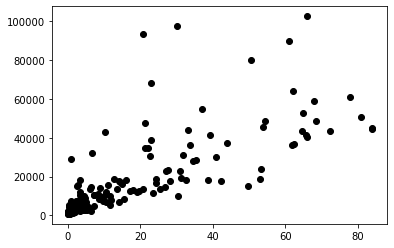

In [29]:
plt.plot(df_2004.Internet_Users_Pct, df_2004.GDP_Per_Capita, 'o', color='black');

##### 2009 Scatter Plot

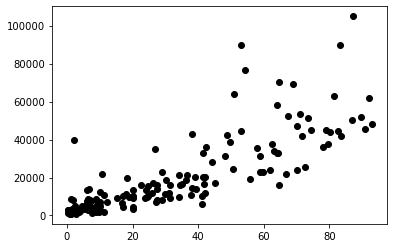

In [30]:
plt.plot(df_2009.Internet_Users_Pct, df_2009.GDP_Per_Capita, 'o', color='black');

##### 2014 Scatter Plot

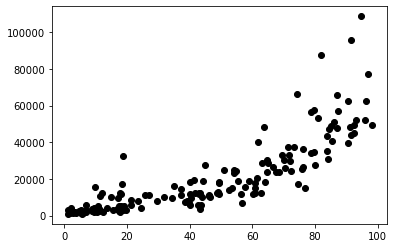

In [31]:
plt.plot(df_2014.Internet_Users_Pct, df_2014.GDP_Per_Capita, 'o', color='black');

#### 24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

##### As the years have progressed there is a direct relation between the two.  The higher the gdp per capita the higher the internet user percentage is.

#### 25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

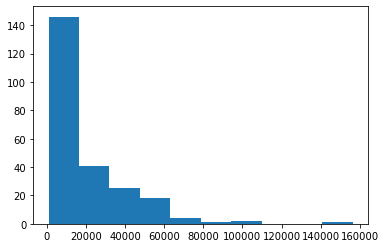

In [32]:
plt.hist(df_2014.GDP_Per_Capita); #Yes

#### 26.	Look at the distribution of Internet Use for 2014. Is it unimodal?

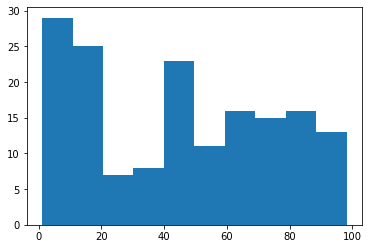

In [33]:
plt.hist(df_2014.Internet_Users_Pct); #No

#### 27. What are the top 5 countries in terms of internet use in 2014?

In [34]:
top_5_2014 = df_2014.nlargest(5, "Internet_Users_Pct")
print(top_5_2014)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625     Iceland  2014    49652.149500               98.16
561      Bermuda  2014    77361.104881               96.80
4648      Norway  2014    62589.373548               96.30
1452     Denmark  2014    52214.537753               95.99
3691  Luxembourg  2014   108760.916030               94.67


28. ##### Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [35]:
top_5_internet = pd.merge(subset_df, top_5_2014, how='inner', on=['Country'])
top_5_internet = top_5_internet.drop(columns=['Year_y', 'GDP_Per_Capita_y','Internet_Users_Pct_y'])
top_5_internet.rename(
    columns={"Year_x" : "Year",
                "GDP_Per_Capita_x" : "GDP_Per_Capita", "Internet_Users_Pct_x" : "Internet_Users_Pct"}
          ,inplace=True)

In [36]:
#print(top_5_internet.shape) 
print(top_5_internet)

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0      Bermuda  2004    90195.811033           60.990867
1      Bermuda  2009    89961.982744           83.250000
2      Bermuda  2014    77361.104881           96.800000
3      Denmark  2004    50607.628971           80.930000
4      Denmark  2009    50274.075696           86.840000
5      Denmark  2014    52214.537753           95.990000
6      Iceland  2004    45145.545658           83.880000
7      Iceland  2009    48177.084123           93.000000
8      Iceland  2014    49652.149500           98.160000
9   Luxembourg  2004   102708.212547           65.880000
10  Luxembourg  2009   104932.811953           87.310000
11  Luxembourg  2014   108760.916030           94.670000
12      Norway  2004    60893.410993           77.690000
13      Norway  2009    61886.564498           92.080000
14      Norway  2014    62589.373548           96.300000


#### 29. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

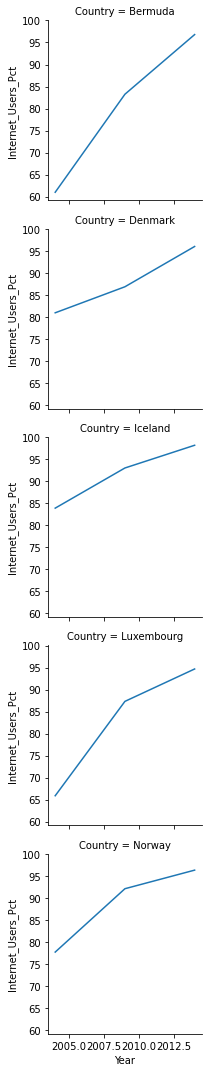

In [52]:
s = sns.FacetGrid(top_5_internet, row="Country")
s.map(sns.lineplot, "Year", "Internet_Users_Pct")

#Bermuda

#### 30.Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?


In [38]:
# Timor-Leste maybe Burundi though

bottom_5_2014 = df_2014.nsmallest(5, "Internet_Users_Pct")
print(bottom_5_2014)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6219  Timor-Leste  2014     3264.568070                1.14
827       Burundi  2014      886.235777                1.38
2326       Guinea  2014     2061.760973                1.72
4528        Niger  2014     1127.615541                1.95
4332      Myanmar  2014     4020.037369                2.10


In [39]:
bottom_5_internet = pd.merge(subset_df, bottom_5_2014, how='inner', on=['Country'])
bottom_5_internet = bottom_5_internet.drop(columns=['Year_y', 'GDP_Per_Capita_y','Internet_Users_Pct_y'])
bottom_5_internet.rename(
    columns={"Year_x" : "Year",
                "GDP_Per_Capita_x" : "GDP_Per_Capita", "Internet_Users_Pct_x" : "Internet_Users_Pct"}
          ,inplace=True)

In [40]:
print(bottom_5_internet.shape)
print(bottom_5_internet)

(15, 4)
        Country  Year  GDP_Per_Capita  Internet_Users_Pct
0       Burundi  2004      817.460585            0.349060
1       Burundi  2009      831.564131            0.900000
2       Burundi  2014      886.235777            1.380000
3        Guinea  2004     1778.079082            0.508819
4        Guinea  2009     1825.576637            0.940000
5        Guinea  2014     2061.760973            1.720000
6       Myanmar  2004     1696.881760            0.024337
7       Myanmar  2009     2874.780227            0.220000
8       Myanmar  2014     4020.037369            2.100000
9         Niger  2004      929.883920            0.189934
10        Niger  2009      992.409977            0.760000
11        Niger  2014     1127.615541            1.950000
12  Timor-Leste  2004     2258.608056                 NaN
13  Timor-Leste  2009     2724.770973            0.185252
14  Timor-Leste  2014     3264.568070            1.140000


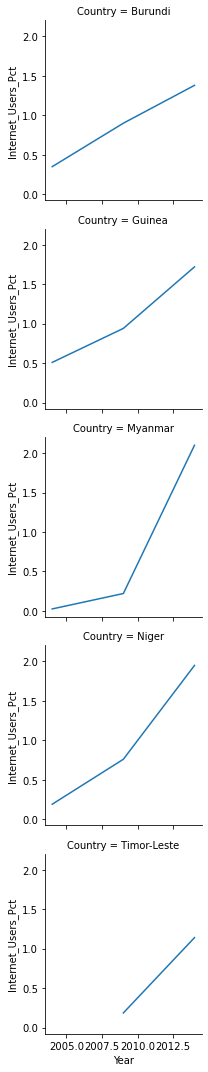

In [51]:
s1 = sns.FacetGrid(bottom_5_internet, row="Country")
s1.map(sns.lineplot, "Year", "Internet_Users_Pct")

#### 31. Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [42]:
top_5_GDP_2014 = df_2014.nlargest(5, "GDP_Per_Capita")
print(top_5_GDP_2014)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014   156514.133850                 NaN
3691        Luxembourg  2014   108760.916030               94.67
5138             Qatar  2014    95578.416973               91.49
5464         Singapore  2014    87808.663157               82.00
561            Bermuda  2014    77361.104881               96.80


In [43]:
top_5_gdp = pd.merge(subset_df, top_5_GDP_2014, how='inner', on=['Country'])
top_5_gdp = top_5_gdp.drop(columns=['Year_y', 'GDP_Per_Capita_y','Internet_Users_Pct_y'])
top_5_gdp.rename(
    columns={"Year_x" : "Year",
                "GDP_Per_Capita_x" : "GDP_Per_Capita", "Internet_Users_Pct_x" : "Internet_Users_Pct"}
          ,inplace=True)

In [44]:
print(top_5_gdp.shape)
print(top_5_gdp)

(15, 4)
             Country  Year  GDP_Per_Capita  Internet_Users_Pct
0            Bermuda  2004    90195.811033           60.990867
1            Bermuda  2009    89961.982744           83.250000
2            Bermuda  2014    77361.104881           96.800000
3         Luxembourg  2004   102708.212547           65.880000
4         Luxembourg  2009   104932.811953           87.310000
5         Luxembourg  2014   108760.916030           94.670000
6   Macao SAR, China  2004    72944.409424                 NaN
7   Macao SAR, China  2009    95939.340822                 NaN
8   Macao SAR, China  2014   156514.133850                 NaN
9              Qatar  2004    93748.301216           20.701648
10             Qatar  2009    89954.519993           53.100000
11             Qatar  2014    95578.416973           91.490000
12         Singapore  2004    63901.716368           62.000000
13         Singapore  2009    69466.581746           69.000000
14         Singapore  2014    87808.663157     

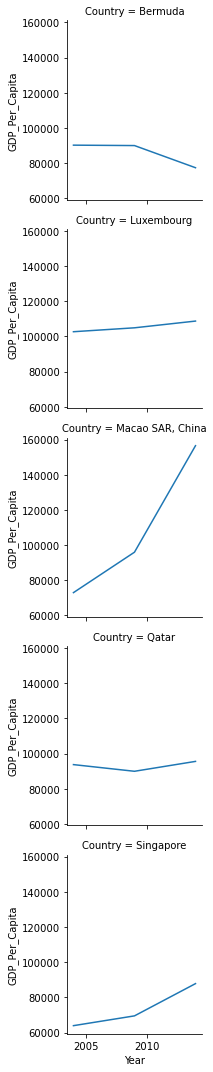

In [50]:
g = sns.FacetGrid(top_5_gdp, row="Country")
g.map(sns.lineplot, "Year", "GDP_Per_Capita")

#### 32. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [46]:
bottom_5_GDP_2014 = df_2014.nsmallest(5, "GDP_Per_Capita")
print(bottom_5_GDP_2014)

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN
827                    Burundi  2014      886.235777                1.38
3781                    Malawi  2014     1027.208496                5.83
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
4528                     Niger  2014     1127.615541                1.95


In [47]:
bot_5_gdp = pd.merge(subset_df, bottom_5_GDP_2014, how='inner', on=['Country'])
bot_5_gdp = bot_5_gdp.drop(columns=['Year_y', 'GDP_Per_Capita_y','Internet_Users_Pct_y'])
bot_5_gdp.rename(
    columns={"Year_x" : "Year",
                "GDP_Per_Capita_x" : "GDP_Per_Capita", "Internet_Users_Pct_x" : "Internet_Users_Pct"}
          ,inplace=True)

In [48]:
print(bot_5_gdp.shape)
print(bot_5_gdp)

(15, 4)
                     Country  Year  GDP_Per_Capita  Internet_Users_Pct
0                    Burundi  2004      817.460585            0.349060
1                    Burundi  2009      831.564131            0.900000
2                    Burundi  2014      886.235777            1.380000
3   Central African Republic  2004     1037.846766                 NaN
4   Central African Republic  2009     1161.189475                 NaN
5   Central African Republic  2014      822.610458                 NaN
6            Dem. Rep. Congo  2004      757.685942                 NaN
7            Dem. Rep. Congo  2009      835.611696                 NaN
8            Dem. Rep. Congo  2014     1029.790785                 NaN
9                     Malawi  2004      775.346132            0.347505
10                    Malawi  2009      932.867635            1.070000
11                    Malawi  2014     1027.208496            5.830000
12                     Niger  2004      929.883920            0.18993

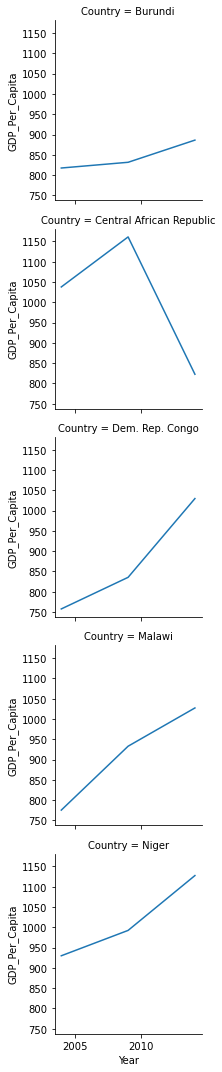

In [49]:
g = sns.FacetGrid(bot_5_gdp, row="Country")
g.map(sns.lineplot, "Year", "GDP_Per_Capita")

#### A conflict erupted in Central African Republic between the years 2009 and 2014 in our dataset directly affecting the GDP_Per_Capita.